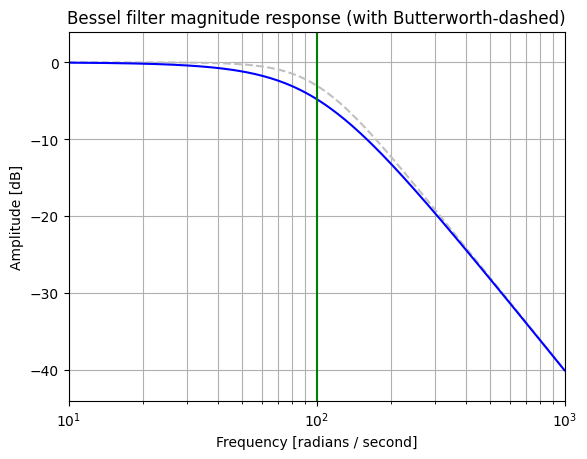

In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
order = 2
Fc    = 100
b1, a1 = signal.butter(order, Fc, 'low', analog=True)
w1, h1 = signal.freqs(b1, a1)
plt.semilogx(w1, 20 * np.log10(np.abs(h1)), color='silver', ls='dashed')
b, a = signal.bessel(order, Fc, 'low', analog=True, norm='phase')
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(np.abs(h)), color='blue')
plt.title('Bessel filter magnitude response (with Butterworth-dashed)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green')  # cutoff frequency
plt.show()

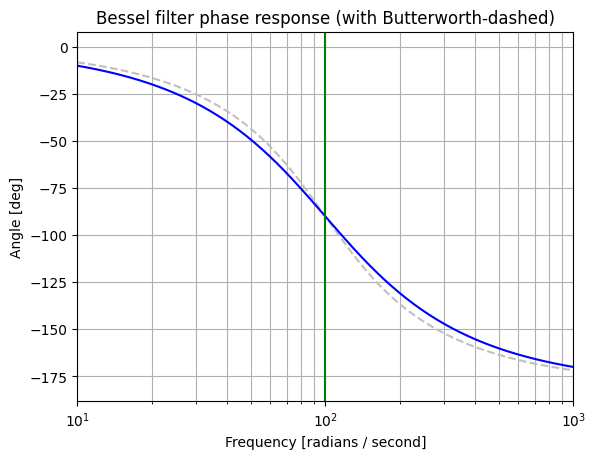

In [13]:
plt.semilogx(w1, 180*np.angle(h1)/np.pi, color='silver', ls='dashed')
plt.semilogx(w,  180*np.angle(h) /np.pi, color='blue')
plt.title('Bessel filter phase response (with Butterworth-dashed)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Angle [deg]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green')  # cutoff frequency
plt.show()

a= [0.005235987755982988, 0, -0.005235987755982988]
b= [4.005278824580641, 7.999914326350685, -3.9948068490686746]


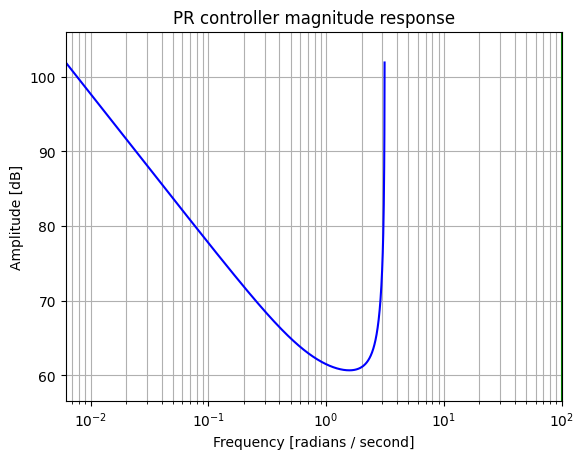

In [12]:
# PR controller design according to 
# https://imperix.com/doc/implementation/proportional-resonant-controller
# the home page is worth to look at - many control related 
#
# another interesting links are 
# https://www.mdpi.com/2079-9292/7/12/451


from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

Fs = 48000.0
Ts= 1/Fs
Ki = 1.0
Kp = 1.0
bw = 10.0
F0 = 50.0
OmegaC = np.pi*2*bw
Omega0 = np.pi*2*F0

a1 = 4*Ki*Ts*OmegaC
b0 = Ts*Ts*Omega0*Omega0 + 4*Ts*OmegaC + 4
b1 = 2*Ts*Ts*Omega0*Omega0 - 8
b2 = Ts*Ts*Omega0*Omega0 - 4*Ts*OmegaC + 4

a = [a1, 0, -a1]
b = [b0, -b1, -b2]
print ('a=',a)
print ('b=',b)

w, h = signal.freqz(b, a)

plt.semilogx(w, 20 * np.log10(np.abs(h)), color='blue')
plt.title('PR controller magnitude response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green')  # cutoff frequency
plt.show()

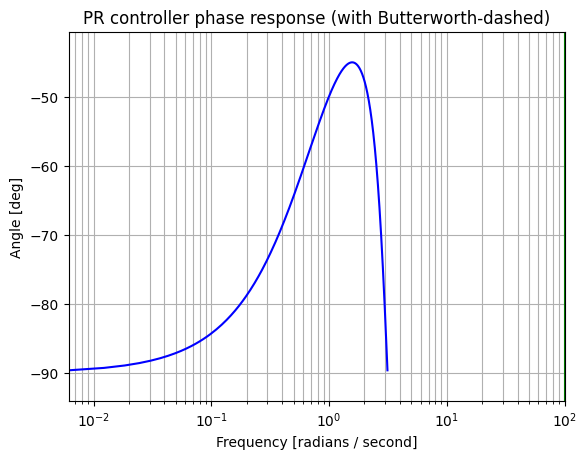

In [13]:
plt.semilogx(w,  180*np.angle(h) /np.pi, color='blue')
plt.title('PR controller phase response (with Butterworth-dashed)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Angle [deg]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green')  # cutoff frequency
plt.show()